In [2]:
# LunarLanderContinuous DDPG (PyTorch)

#DDPG implementation:
#- Actor and Critic networks (fully-connected)
#- Replay Buffer
#- Ornstein-Uhlenbeck exploration noise
#- Soft target updates
#- Training loop + evaluation


In [8]:
!pip install gymnasium[box2d]


  Using cached box2d-py-2.3.5.tar.gz (374 kB)
  Preparing metadata (setup.py) ... done
  Using cached swig-4.3.1.post0-py3-none-manylinux_2_12_x86_64.manylinux2010_x86_64.whl.metadata (3.5 kB)
Using cached swig-4.3.1.post0-py3-none-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (1.9 MB)
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for box2d-py
  Running setup.py clean for box2d-py
Failed to build box2d-py
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (box2d-py)


In [10]:
!pip uninstall -y box2d-py Box2D
!pip install box2d


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 49.7 MB/s eta 0:00:00


In [12]:
import gymnasium as gym

env = gym.make("LunarLanderContinuous-v3", render_mode="human")
obs, info = env.reset()
print("Observation:", obs)
print("Action space:", env.action_space)


<frozen importlib._bootstrap>:488: DeprecationWarning: builtin type SwigPyPacked has no __module__ attribute
<frozen importlib._bootstrap>:488: DeprecationWarning: builtin type SwigPyObject has no __module__ attribute
<frozen importlib._bootstrap>:488: DeprecationWarning: builtin type swigvarlink has no __module__ attribute
/usr/local/lib/python3.12/dist-packages/pygame/pkgdata.py:25: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import resource_stream, resource_exists
/usr/local/lib/python3.12/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/usr/local/lib/python3.12/dist-packages/

Observation: [ 0.00539331  1.4100337   0.54627657 -0.03940647 -0.00624279 -0.12373976
  0.          0.        ]
Action space: Box(-1.0, 1.0, (2,), float32)


In [19]:
!pip uninstall -y box2d-py Box2D box2d box2d


In [20]:
!pip install box2d


  Using cached Box2D-2.3.10-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (573 bytes)
Using cached Box2D-2.3.10-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.7 MB)


In [21]:
!pip install gymnasium


In [22]:
import gymnasium as gym

env = gym.make("LunarLanderContinuous-v3", render_mode="human")
obs, info = env.reset()
print("Observation shape:", obs.shape)

done = False
while not done:
    action = env.action_space.sample()
    obs, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated
env.close()


Observation shape: (8,)


In [23]:
!pip install gymnasium[box2d] torch torchvision numpy matplotlib


  Using cached box2d-py-2.3.5.tar.gz (374 kB)
  Preparing metadata (setup.py) ... done
  Using cached swig-4.3.1.post0-py3-none-manylinux_2_12_x86_64.manylinux2010_x86_64.whl.metadata (3.5 kB)
Using cached swig-4.3.1.post0-py3-none-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (1.9 MB)
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for box2d-py
  Running setup.py clean for box2d-py
Failed to build box2d-py
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (box2d-py)


In [4]:
import gym
import math
import random
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from copy import deepcopy


Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=

In [24]:
# Run this cell once at the top of the notebook
# (If you're on Colab, use these; on local, run in your env/conda prompt instead of notebook if you prefer.)
!pip install --upgrade pip
!pip install box2d gymnasium torch torchvision numpy matplotlib imageio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 27.7 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [25]:
import gymnasium as gym
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import random
from collections import deque
import matplotlib.pyplot as plt
import imageio   # for saving GIFs (Colab)
import os
from copy import deepcopy

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)


Device: cpu


In [26]:
# optional reproducibility
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)

# Simple normalizer for states (helps some algorithms)
class RunningStat:
    def __init__(self, shape):
        self._n = 0
        self._M = np.zeros(shape, dtype=np.float64)
        self._S = np.zeros(shape, dtype=np.float64)
    def push(self, x):
        x = np.asarray(x)
        if self._n == 0:
            self._M[...] = x
        else:
            oldM = self._M.copy()
            self._M[...] = oldM + (x - oldM) / (self._n+1)
            self._S[...] = self._S + (x - oldM) * (x - self._M)
        self._n += 1
    def mean(self):
        return self._M
    def var(self):
        return (self._S / (self._n - 1)) if self._n > 1 else np.square(self._M)
    def std(self):
        return np.sqrt(self.var())

def normalize_state(s, stat: RunningStat):
    if stat._n > 1:
        return (s - stat.mean()) / (stat.std() + 1e-8)
    else:
        return s


In [27]:
class Actor(nn.Module):
    def __init__(self, state_dim, action_dim, action_limit):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(state_dim, 400),
            nn.ReLU(),
            nn.Linear(400, 300),
            nn.ReLU(),
            nn.Linear(300, action_dim),
            nn.Tanh()
        )
        self.action_limit = action_limit

    def forward(self, s):
        return self.net(s) * self.action_limit


class Critic(nn.Module):
    def __init__(self, state_dim, action_dim):
        super().__init__()
        # concat state and action
        self.net = nn.Sequential(
            nn.Linear(state_dim + action_dim, 400),
            nn.ReLU(),
            nn.Linear(400, 300),
            nn.ReLU(),
            nn.Linear(300, 1)
        )

    def forward(self, s, a):
        x = torch.cat([s, a], dim=1)
        return self.net(x)


In [51]:
class ReplayBuffer:
    def __init__(self, capacity=1000000):
        self.capacity = capacity
        self.buffer = []
        self.position = 0

    def push(self, state, action, reward, next_state, done):
        if len(self.buffer) < self.capacity:
            self.buffer.append(None)
        self.buffer[self.position] = (state, action, reward, next_state, done)
        self.position = (self.position + 1) % self.capacity

    def sample(self, batch_size):
        import random
        batch = random.sample(self.buffer, batch_size)
        state, action, reward, next_state, done = map(np.stack, zip(*batch))
        return state, action, reward, next_state, done

    def __len__(self):
        return len(self.buffer)


class OUNoise:
    def __init__(self, dim, mu=0.0, theta=0.15, sigma=0.2):
        self.dim = dim
        self.mu = mu * np.ones(dim)
        self.theta = theta
        self.sigma = sigma
        self.reset()
    def reset(self):
        self.state = self.mu.copy()
    def sample(self):
        dx = self.theta * (self.mu - self.state) + self.sigma * np.random.randn(self.dim)
        self.state = self.state + dx
        return self.state


In [52]:
class DDPG:
    def __init__(self, state_dim, action_dim, action_limit, device="cpu",
                 actor_lr=1e-4, critic_lr=1e-3, gamma=0.99, tau=0.005):
        self.device = torch.device(device)
        self.gamma = gamma
        self.tau = tau

        self.actor = Actor(state_dim, action_dim, action_limit).to(self.device)
        self.actor_target = deepcopy(self.actor).to(self.device)

        self.critic = Critic(state_dim, action_dim).to(self.device)
        self.critic_target = deepcopy(self.critic).to(self.device)

        self.actor_opt = optim.Adam(self.actor.parameters(), lr=actor_lr)
        self.critic_opt = optim.Adam(self.critic.parameters(), lr=critic_lr)

        self.action_limit = action_limit
        self.replay_buffer = ReplayBuffer(capacity=1000000)


    def select_action(self, state, noise=None):
      state_tensor = torch.FloatTensor(state).unsqueeze(0).to(self.device)
      self.actor.eval()
      with torch.no_grad():
          action = self.actor(state_tensor).cpu().numpy()[0]
      self.actor.train()

      if noise is not None:  # ✅ fix: only check if noise is provided
          action = action + noise

      return np.clip(action, -self.action_limit, self.action_limit)


    def update(self, batch, batch_size):
        states, actions, rewards, next_states, dones = batch
        states = torch.FloatTensor(states).to(self.device)
        actions = torch.FloatTensor(actions).to(self.device)
        rewards = torch.FloatTensor(rewards).to(self.device)
        next_states = torch.FloatTensor(next_states).to(self.device)
        dones = torch.FloatTensor(dones).to(self.device)

        # Critic update
        with torch.no_grad():
            next_actions = self.actor_target(next_states)
            q_next = self.critic_target(next_states, next_actions)
            q_target = rewards + self.gamma * (1.0 - dones) * q_next

        q_val = self.critic(states, actions)
        critic_loss = nn.MSELoss()(q_val, q_target)

        self.critic_opt.zero_grad()
        critic_loss.backward()
        self.critic_opt.step()

        # Actor update
        actor_loss = -self.critic(states, self.actor(states)).mean()
        self.actor_opt.zero_grad()
        actor_loss.backward()
        self.actor_opt.step()

        # Soft update targets
        self.soft_update(self.critic, self.critic_target)
        self.soft_update(self.actor, self.actor_target)

        return critic_loss.item(), actor_loss.item()

    def soft_update(self, net, net_target):
        for p, p_target in zip(net.parameters(), net_target.parameters()):
            p_target.data.copy_(self.tau * p.data + (1.0 - self.tau) * p_target.data)

    def save(self, prefix="ddpg"):
        torch.save(self.actor.state_dict(), f"{prefix}_actor.pth")
        torch.save(self.critic.state_dict(), f"{prefix}_critic.pth")

    def load(self, prefix="ddpg"):
        self.actor.load_state_dict(torch.load(f"{prefix}_actor.pth", map_location=self.device))
        self.critic.load_state_dict(torch.load(f"{prefix}_critic.pth", map_location=self.device))
        self.actor_target.load_state_dict(self.actor.state_dict())
        self.critic_target.load_state_dict(self.critic.state_dict())


In [41]:
# Environment and hyperparams
env_name = "LunarLanderContinuous-v3"
env = gym.make(env_name)   # no render_mode here for training; for eval use render_mode
state, _ = env.reset()
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.shape[0]
action_limit = float(env.action_space.high[0])  # symmetric

print("state_dim, action_dim, action_limit:", state_dim, action_dim, action_limit)

agent = DDPG(state_dim, action_dim, action_limit, device=device)
replay = ReplayBuffer(maxlen=200000)
ou_noise = OUNoise(action_dim, mu=0.0, theta=0.15, sigma=0.2)

# training hyperparams
episodes = 2000  # instead of 200
max_steps = 1000
batch_size = 128
warmup = 2000   # fill buffer with random actions
stat = RunningStat(state_dim)  # if you want to normalize states
save_dir = "./ddpg_models"
os.makedirs(save_dir, exist_ok=True)


state_dim, action_dim, action_limit: 8 2 1.0


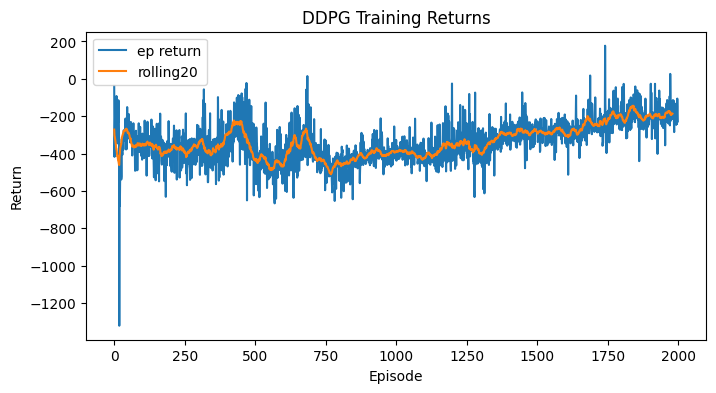

In [43]:
plt.figure(figsize=(8,4))
plt.plot(returns, label="ep return")
plt.plot(np.convolve(returns, np.ones(20)/20, mode='valid'), label="rolling20")
plt.xlabel("Episode")
plt.ylabel("Return")
plt.legend()
plt.title("DDPG Training Returns")
plt.show()


In [44]:
# load best model if saved
agent.load(os.path.join(save_dir, "best_ddpg"))

env_eval = gym.make(env_name, render_mode="human")
for ep in range(3):
    s, _ = env_eval.reset()
    done = False
    tot = 0.0
    while not done:
        a = agent.select_action(s, noise=0.0)  # no exploration
        s, r, terminated, truncated, info = env_eval.step(a)
        done = terminated or truncated
        tot += r
    print("Eval return:", tot)
env_eval.close()


Eval return: -521.8590065651526
Eval return: -488.53230764810905
Eval return: -582.212760377188


In [45]:
agent.load(os.path.join(save_dir, "best_ddpg"))

env_eval = gym.make(env_name, render_mode="rgb_array")
frames = []
s, _ = env_eval.reset()
done = False
tot = 0.0
while not done:
    a = agent.select_action(s, noise=0.0)
    s, r, terminated, truncated, info = env_eval.step(a)
    done = terminated or truncated
    tot += r
    frame = env_eval.render()
    frames.append(frame)
print("Eval return:", tot)
env_eval.close()

# Save GIF
out_path = "ddpg_eval.gif"
imageio.mimsave(out_path, frames, fps=30)
print("Saved GIF to", out_path)


Eval return: -580.4666382170865
Saved GIF to ddpg_eval.gif


In [46]:
import os
print(os.getcwd())
!ls -lh ddpg_eval.gif


/content
-rw-r--r-- 1 root root 165K Sep 15 15:16 ddpg_eval.gif


In [47]:
from google.colab import files
files.download("ddpg_eval.gif")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [53]:
import numpy as np
import random
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

# ==============================
# Replay Buffer
# ==============================
class ReplayBuffer:
    def __init__(self, capacity=1000000):
        self.capacity = capacity
        self.buffer = []
        self.position = 0

    def push(self, state, action, reward, next_state, done):
        if len(self.buffer) < self.capacity:
            self.buffer.append(None)
        self.buffer[self.position] = (state, action, reward, next_state, done)
        self.position = (self.position + 1) % self.capacity

    def sample(self, batch_size):
        batch = random.sample(self.buffer, batch_size)
        state, action, reward, next_state, done = map(np.stack, zip(*batch))
        return (state, action, reward, next_state, done)

    def __len__(self):
        return len(self.buffer)

# ==============================
# Actor Network
# ==============================
class Actor(nn.Module):
    def __init__(self, state_dim, action_dim, action_limit):
        super(Actor, self).__init__()
        self.fc1 = nn.Linear(state_dim, 400)
        self.fc2 = nn.Linear(400, 300)
        self.fc3 = nn.Linear(300, action_dim)
        self.action_limit = action_limit

    def forward(self, state):
        x = F.relu(self.fc1(state))
        x = F.relu(self.fc2(x))
        return torch.tanh(self.fc3(x)) * self.action_limit

# ==============================
# Critic Network
# ==============================
class Critic(nn.Module):
    def __init__(self, state_dim, action_dim):
        super(Critic, self).__init__()
        self.fc1 = nn.Linear(state_dim + action_dim, 400)
        self.fc2 = nn.Linear(400, 300)
        self.fc3 = nn.Linear(300, 1)

    def forward(self, state, action):
        x = torch.cat([state, action], dim=1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.fc3(x)

# ==============================
# Ornstein-Uhlenbeck Noise
# ==============================
class OUNoise:
    def __init__(self, action_dim, mu=0.0, theta=0.15, sigma=0.2):
        self.action_dim = action_dim
        self.mu = mu
        self.theta = theta
        self.sigma = sigma
        self.state = np.ones(self.action_dim) * self.mu

    def reset(self):
        self.state = np.ones(self.action_dim) * self.mu

    def sample(self):
        dx = self.theta * (self.mu - self.state) + self.sigma * np.random.randn(self.action_dim)
        self.state += dx
        return self.state

# ==============================
# DDPG Agent
# ==============================
class DDPG:
    def __init__(self, state_dim, action_dim, action_limit, gamma=0.99, tau=0.005, actor_lr=1e-4, critic_lr=1e-3):
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

        self.actor = Actor(state_dim, action_dim, action_limit).to(self.device)
        self.actor_target = Actor(state_dim, action_dim, action_limit).to(self.device)
        self.critic = Critic(state_dim, action_dim).to(self.device)
        self.critic_target = Critic(state_dim, action_dim).to(self.device)

        self.actor_target.load_state_dict(self.actor.state_dict())
        self.critic_target.load_state_dict(self.critic.state_dict())

        self.actor_optimizer = optim.Adam(self.actor.parameters(), lr=actor_lr)
        self.critic_optimizer = optim.Adam(self.critic.parameters(), lr=critic_lr)

        self.gamma = gamma
        self.tau = tau
        self.replay_buffer = ReplayBuffer(capacity=1000000)

    def select_action(self, state, noise=None):
        state_tensor = torch.FloatTensor(state).unsqueeze(0).to(self.device)
        self.actor.eval()
        with torch.no_grad():
            action = self.actor(state_tensor).cpu().numpy()[0]
        self.actor.train()
        if noise is not None:
            action = action + noise
        return np.clip(action, -1.0, 1.0)

    def train(self, batch_size=64):
        if len(self.replay_buffer) < batch_size:
            return

        states, actions, rewards, next_states, dones = self.replay_buffer.sample(batch_size)

        states = torch.FloatTensor(states).to(self.device)
        actions = torch.FloatTensor(actions).to(self.device)
        rewards = torch.FloatTensor(rewards).unsqueeze(1).to(self.device)
        next_states = torch.FloatTensor(next_states).to(self.device)
        dones = torch.FloatTensor(dones).unsqueeze(1).to(self.device)

        # Critic loss
        next_actions = self.actor_target(next_states)
        target_q = self.critic_target(next_states, next_actions)
        expected_q = rewards + self.gamma * (1 - dones) * target_q
        current_q = self.critic(states, actions)
        critic_loss = F.mse_loss(current_q, expected_q.detach())

        self.critic_optimizer.zero_grad()
        critic_loss.backward()
        self.critic_optimizer.step()

        # Actor loss
        actor_loss = -self.critic(states, self.actor(states)).mean()

        self.actor_optimizer.zero_grad()
        actor_loss.backward()
        self.actor_optimizer.step()

        # Soft update
        self.soft_update(self.actor, self.actor_target)
        self.soft_update(self.critic, self.critic_target)

    def soft_update(self, net, target_net):
        for target_param, param in zip(target_net.parameters(), net.parameters()):
            target_param.data.copy_(self.tau * param.data + (1 - self.tau) * target_param.data)


In [54]:
import gymnasium as gym

env = gym.make("LunarLanderContinuous-v3")
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.shape[0]
action_limit = float(env.action_space.high[0])

agent = DDPG(state_dim, action_dim, action_limit)
ou_noise = OUNoise(action_dim)

episodes = 200
for ep in range(episodes):
    state, _ = env.reset()
    ou_noise.reset()
    ep_return = 0

    done = False
    while not done:
        noise = ou_noise.sample() * max(0.1, 1.0 - ep/episodes)
        action = agent.select_action(state, noise=noise)
        next_state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated

        agent.replay_buffer.push(state, action, reward, next_state, done)
        agent.train(batch_size=64)

        state = next_state
        ep_return += reward

    print(f"Episode {ep+1} | Return: {ep_return:.2f}")


Episode 1 | Return: -564.92
Episode 2 | Return: -931.74
Episode 3 | Return: -726.76
Episode 4 | Return: -886.60
Episode 5 | Return: -707.91
Episode 6 | Return: -488.82
Episode 7 | Return: -501.86
Episode 8 | Return: -516.01
Episode 9 | Return: -235.31
Episode 10 | Return: -413.54
Episode 11 | Return: -167.68
Episode 12 | Return: -278.13
Episode 13 | Return: -255.86
Episode 14 | Return: -274.42
Episode 15 | Return: -341.61
Episode 16 | Return: -212.41
Episode 17 | Return: -278.06
Episode 18 | Return: -184.70
Episode 19 | Return: -235.10
Episode 20 | Return: -220.58
Episode 21 | Return: -267.65
Episode 22 | Return: -181.43
Episode 23 | Return: -224.03
Episode 24 | Return: -398.78
Episode 25 | Return: -288.24
Episode 26 | Return: -134.72
Episode 27 | Return: -365.45
Episode 28 | Return: -206.77
Episode 29 | Return: -250.80
Episode 30 | Return: -173.45
Episode 31 | Return: -116.26
Episode 32 | Return: -151.64
Episode 33 | Return: -206.88
Episode 34 | Return: -209.79
Episode 35 | Return: -1

In [55]:
import gymnasium as gym

class ShapedLunarLander(gym.Wrapper):
    def __init__(self, env):
        super().__init__(env)

    def step(self, action):
        state, reward, terminated, truncated, info = self.env.step(action)

        # --- Reward Shaping ---
        x, y, vx, vy, angle, angular_vel, left_leg, right_leg = state

        shaped_reward = reward

        # Positive reward for legs touching ground
        shaped_reward += 10.0 * (left_leg + right_leg)

        # Negative reward for tilting too much
        shaped_reward -= 5.0 * (abs(angle) > 0.4)

        # Efficiency reward: small penalty for using too much thrust
        shaped_reward -= 0.1 * np.square(action).sum()

        info["shaped_reward"] = shaped_reward
        return state, shaped_reward, terminated, truncated, info


In [56]:
env = ShapedLunarLander(gym.make("LunarLanderContinuous-v3"))


Episode 1 | Return: -125.41
Episode 2 | Return: -146.17
Episode 3 | Return: -182.83
Episode 4 | Return: -170.63
Episode 5 | Return: -140.57
Episode 6 | Return: -192.43
Episode 7 | Return: -156.74
Episode 8 | Return: -146.57
Episode 9 | Return: -306.14
Episode 10 | Return: -153.49
Episode 11 | Return: -361.36
Episode 12 | Return: -262.71
Episode 13 | Return: -317.07
Episode 14 | Return: -230.60
Episode 15 | Return: -359.35
Episode 16 | Return: -335.51
Episode 17 | Return: 2819.73
Episode 18 | Return: -147.53
Episode 19 | Return: -264.12
Episode 20 | Return: 151.43
Episode 21 | Return: -336.68
Episode 22 | Return: -934.57
Episode 23 | Return: -1103.61
Episode 24 | Return: -114.15
Episode 25 | Return: -112.44
Episode 26 | Return: -352.78
Episode 27 | Return: -133.97
Episode 28 | Return: -116.48
Episode 29 | Return: -165.13
Episode 30 | Return: -141.50
Episode 31 | Return: -159.31
Episode 32 | Return: -164.40
Episode 33 | Return: -139.61
Episode 34 | Return: -158.96
Episode 35 | Return: -2

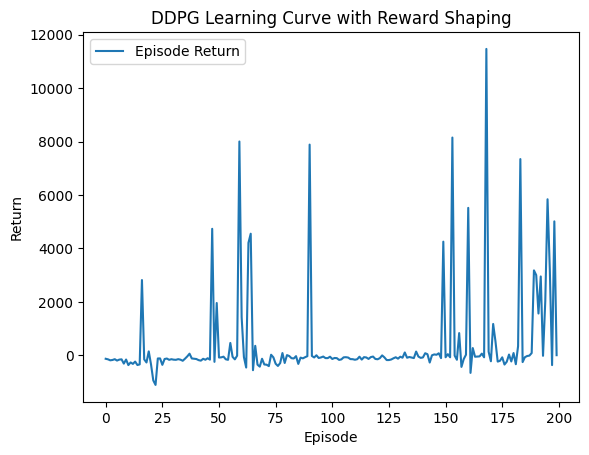

In [57]:
returns = []

for ep in range(episodes):
    state, _ = env.reset()
    ep_return = 0
    done = False

    while not done:
        action = agent.select_action(state, noise=ou_noise.sample())
        next_state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated
        agent.replay_buffer.push(state, action, reward, next_state, done)
        agent.train(64)
        state = next_state
        ep_return += reward

    returns.append(ep_return)
    print(f"Episode {ep+1} | Return: {ep_return:.2f}")

# Plot learning curve
import matplotlib.pyplot as plt
plt.plot(returns, label="Episode Return")
plt.xlabel("Episode")
plt.ylabel("Return")
plt.title("DDPG Learning Curve with Reward Shaping")
plt.legend()
plt.show()
